In [1]:
import pandas as pd
df = pd.read_csv('CS_2.csv') # reading dataset
df.head() # show first 5 rows

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [2]:
df.columns = [i.split()[0] for i in df.columns] # rename columns
df.head()

,Cement,Blast,Fly,Water,Superplasticizer,Coarse,Fine,Age,Concrete
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Cement            1030 non-null   float64
 1   Blast             1030 non-null   float64
 2   Fly               1030 non-null   float64
 3   Water             1030 non-null   float64
 4   Superplasticizer  1030 non-null   float64
 5   Coarse            1030 non-null   float64
 6   Fine              1030 non-null   float64
 7   Age               1030 non-null   int64  
 8   Concrete          1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [4]:
# definning dependent and independ variables
X = df.drop(columns=['Concrete'])
X.head()

,Cement,Blast,Fly,Water,Superplasticizer,Coarse,Fine,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [5]:
y = df.Concrete
y

0       79.986111
1       61.887366
2       40.269535
3       41.052780
4       44.296075
          ...    
1025    44.284354
1026    31.178794
1027    23.696601
1028    32.768036
1029    32.401235
Name: Concrete, Length: 1030, dtype: float64

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

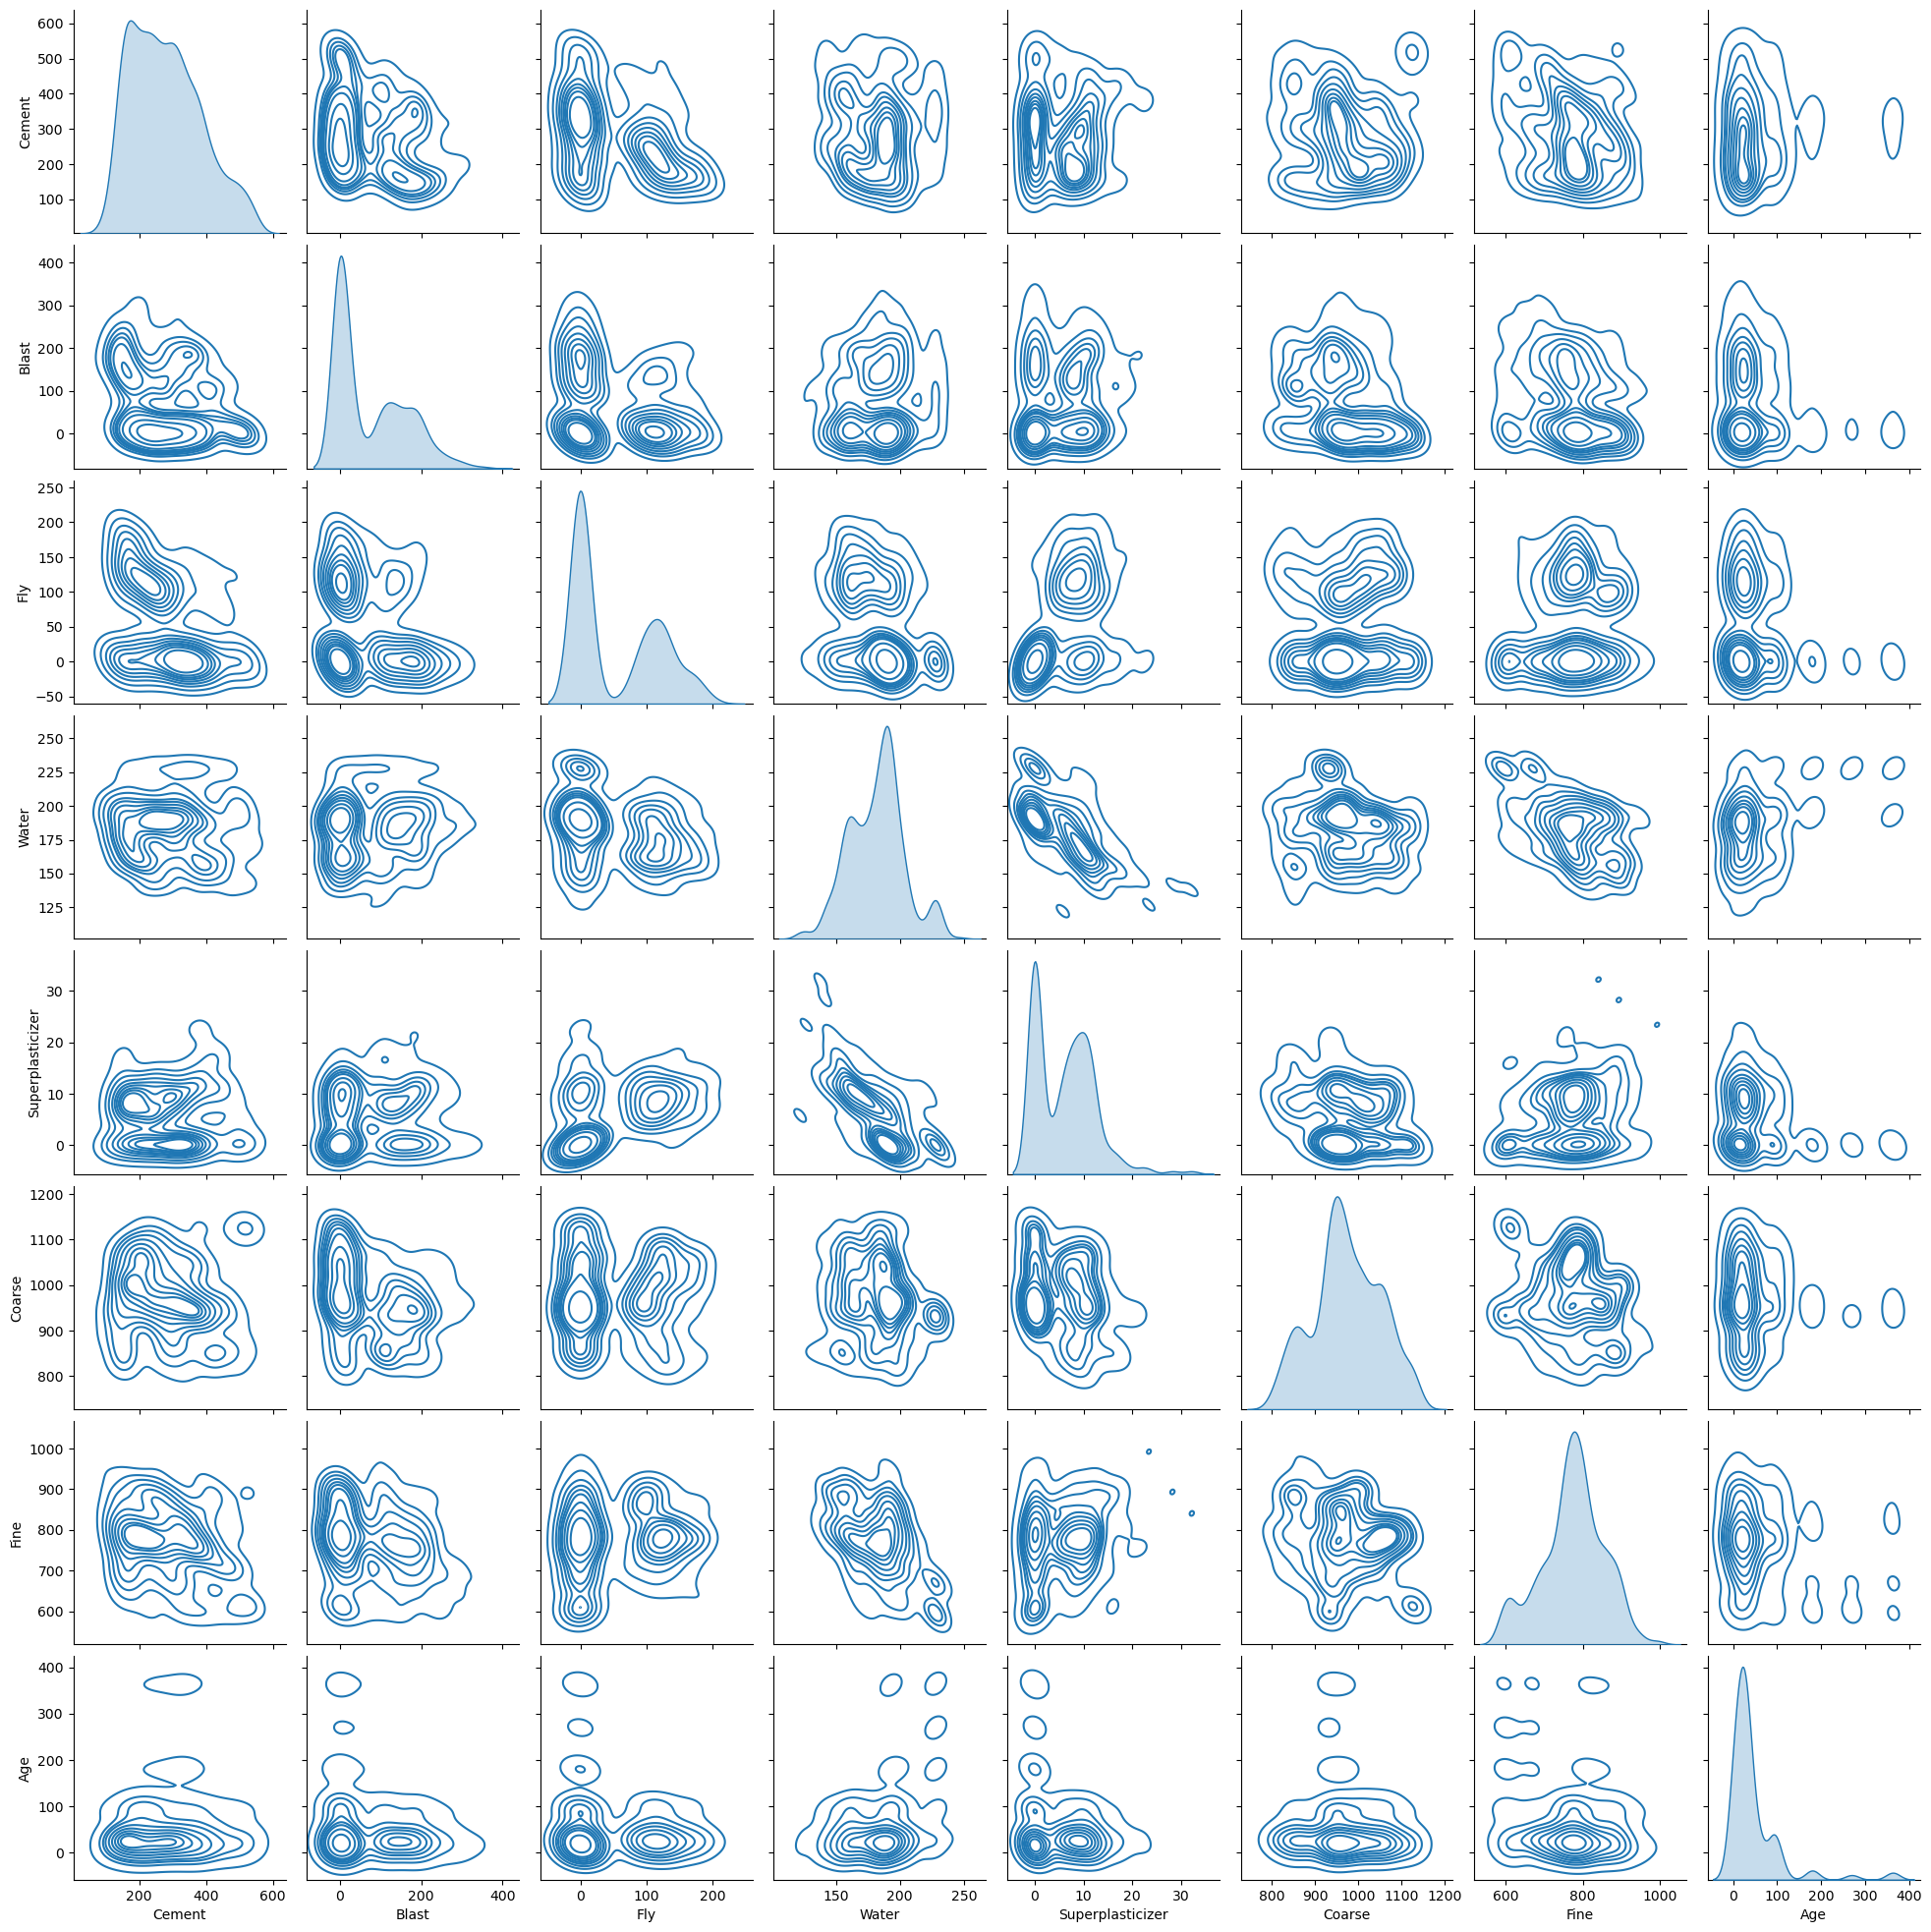

In [7]:
sns.pairplot(X, kind='kde')

<Axes: >

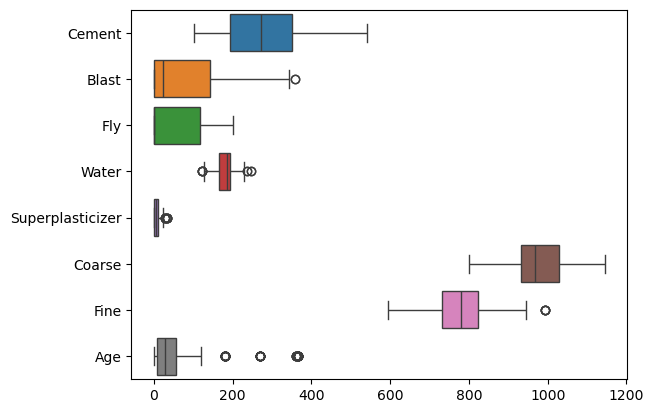

In [8]:
sns.boxplot(X, orient='h')

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = pd.DataFrame(data=scaler.fit_transform(X), columns=X.columns)
X_scaled.head()

,Cement,Blast,Fly,Water,Superplasticizer,Coarse,Fine,Age
0,2.477918,-0.856886,-0.847132,-0.916663,-0.620225,0.863160,-1.217658,-0.279733
1,2.477918,-0.856886,-0.847132,-0.916663,-0.620225,1.056170,-1.217658,-0.279733
2,0.491443,0.795533,-0.847132,2.175367,-1.038944,-0.526514,-2.240913,3.553066
3,0.491443,0.795533,-0.847132,2.175367,-1.038944,-0.526514,-2.240913,5.057677
4,-0.790432,0.678414,-0.847132,0.488805,-1.038944,0.070531,0.647908,4.978487


<Axes: >

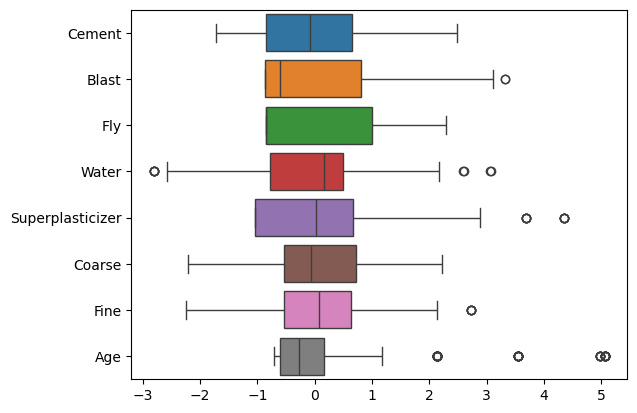

In [10]:
sns.boxplot(X_scaled, orient='h')

In [11]:
from sklearn.preprocessing import PowerTransformer
tformer = PowerTransformer(method='yeo-johnson')
X_tformed = pd.DataFrame(data=tformer.fit_transform(X_scaled), columns=X.columns)
X_tformed.head()

,Cement,Blast,Fly,Water,Superplasticizer,Coarse,Fine,Age
0,2.056475,-0.952057,-0.879669,-0.916514,-0.566654,0.862200,-1.196139,0.009505
1,2.056475,-0.952057,-0.879669,-0.916514,-0.566654,1.057568,-1.196139,0.009505
2,0.603981,0.998204,-0.879669,2.155495,-1.154821,-0.530821,-2.077354,2.033094
3,0.603981,0.998204,-0.879669,2.155495,-1.154821,-0.530821,-2.077354,2.141250
4,-0.778877,0.921731,-0.879669,0.493312,-1.154821,0.064207,0.624929,2.136860


<Axes: >

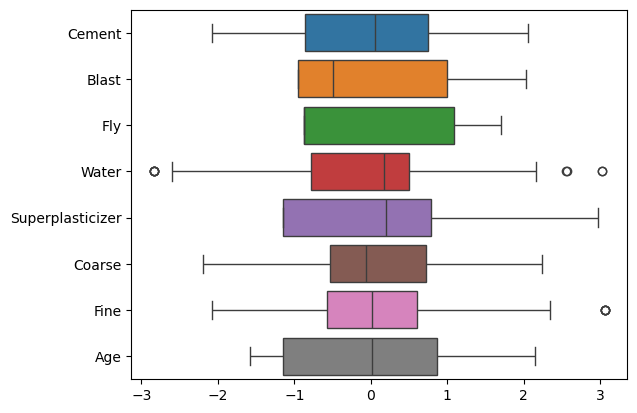

In [12]:
sns.boxplot(X_tformed, orient='h')

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components='mle')
X_pca = pca.fit_transform(X_tformed)

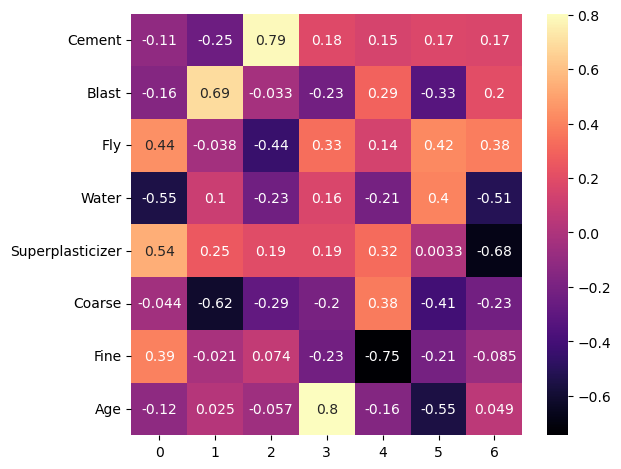

In [14]:
sns.heatmap(pca.components_.T, cmap='magma', annot=True, yticklabels=X.columns, cbar=True)
plt.tight_layout()

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, train_size=0.2, random_state=42)

In [16]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(objective='reg:squarederror')
xgb_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [17]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.3],
    # 'max_depth': [3, 5, 7],
    # 'subsample': [0.6, 0.8, 1.0],
    # 'colsample_bytree': [0.6, 0.8, 1.0],
    # 'min_child_weight': [1, 5, 10],
    # 'gamma': [0, 0.1, 0.2]
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.3],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=1)

In [18]:
grid_search.best_params_

{'learning_rate': 0.1, 'n_estimators': 300}

In [19]:
y_pred_xgb = grid_search.best_estimator_.predict(X_test)

In [20]:
from sklearn.metrics import root_mean_squared_error as rmse, \
    mean_absolute_error as mae, mean_absolute_percentage_error as mape, \
        accuracy_score, r2_score

xgb_metrics = pd.DataFrame({
    'Metric': ['R2 Score', 'RMSE', 'MAE', 'MAPE'],
    'Error': [r2_score(y_test, y_pred_xgb ), rmse(y_test, y_pred_xgb ), mae(y_test, y_pred_xgb ), mape(y_test, y_pred_xgb )]
})

xgb_metrics

,Metric,Error
0,R2 Score,0.768201
1,RMSE,8.191991
2,MAE,5.914451
3,MAPE,0.221508


In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

2024-10-22 11:52:01.918244: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [22]:
def create_model(optimizer='adam', activation='relu', neurons=10):
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train.shape[1], activation=activation))
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(1))  # Output layer for regression
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

In [23]:
ann_model = create_model()
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
history = ann_model.fit(X_train, y_train, validation_split=0.2, epochs=300, batch_size=32, callbacks=[early_stopping], verbose=0)

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


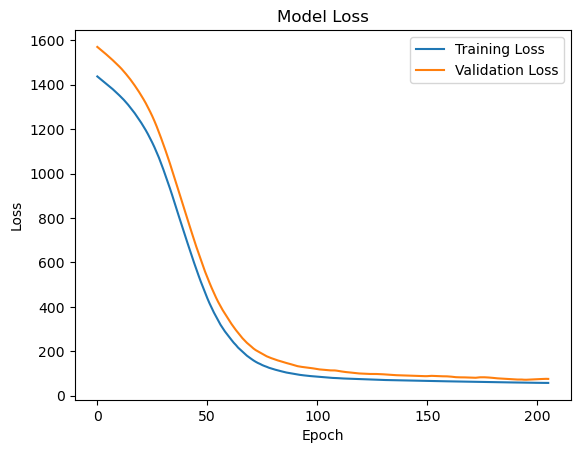

In [24]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

In [25]:
y_pred_ann = ann_model.predict(X_test, verbose=0).reshape(1, -1)[0]

In [26]:
ann_metrics = pd.DataFrame({
    'Metric': ['R2 Score', 'RMSE', 'MAE', 'MAPE'],
    'Error': [r2_score(y_test, y_pred_ann ), rmse(y_test, y_pred_ann ), mae(y_test, y_pred_ann ), mape(y_test, y_pred_ann )]
})

ann_metrics

,Metric,Error
0,R2 Score,0.691087
1,RMSE,9.456969
2,MAE,7.375752
3,MAPE,0.290432


In [27]:
matrix = pd.concat([ann_metrics, xgb_metrics])
matrix['Model']=(4*' ANN'+4*' XGB').split()
matrix

,Metric,Error,Model
0,R2 Score,0.691087,ANN
1,RMSE,9.456969,ANN
2,MAE,7.375752,ANN
3,MAPE,0.290432,ANN
0,R2 Score,0.768201,XGB
1,RMSE,8.191991,XGB
2,MAE,5.914451,XGB
3,MAPE,0.221508,XGB


<Axes: xlabel='Metric', ylabel='Error'>

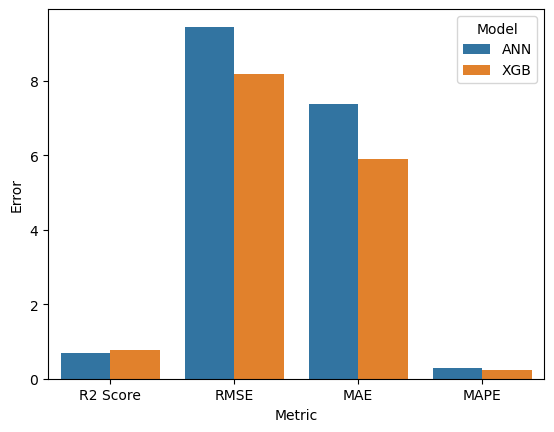

In [28]:
sns.barplot(data=matrix, x='Metric', y='Error', hue='Model')

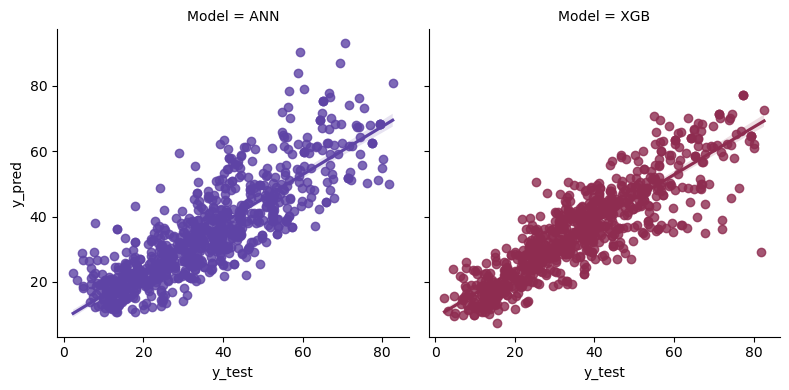

In [30]:
bestf = pd.DataFrame({
    'y_test': y_test,
    'ANN': y_pred_ann,
    'XGB': y_pred_xgb
})

sns.lmplot(
    data=pd.melt(bestf, id_vars='y_test', var_name='Model', value_name='y_pred'), x="y_test", y="y_pred",
    hue="Model", col="Model", height=4, palette='twilight'
)